In [1]:
import pandas as pd
# 文件路径
file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241127地图匹配_v5.xlsx'
# 读取Excel文件
df = pd.read_excel(file_path)

In [11]:
df.head()

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CITYGB_1990a,CNTYGB_1990a,PROVGB_2000,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,老汉的宝物,宁夏
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,6321.0,632122.0,NaN,NaN,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,6301.0,630100.0,NaN,NaN,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,三姊妹,宁夏
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,6323.0,632321.0,63.0,6323.0,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏


In [12]:
df.columns

Index(['rowid', 'name', 'cailu', 'provgb', 'citygb', 'cntygb', 'area',
       'geocode', 'PROVGB_1953', 'CITYGB_1953', 'CNTYGB_1953', 'PROVGB_1964',
       'CITYGB_1964', 'CNTYGB_1964', 'PROVGB_1982', 'CITYGB_1982',
       'CNTYGB_1982', 'PROVGB_1990a', 'CITYGB_1990a', 'CNTYGB_1990a',
       'PROVGB_2000', 'CITYGB_2000', 'CNTYGB_2000', 'PROVGB_2010',
       'CITYGB_2010', 'CNTYGB_2010', 'new_name', 'area_group'],
      dtype='object')

In [13]:
import geopandas as gpd

# 读取 Shapefile 数据
shp_1982 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/china_1982pop/china82.shp")
shp_1990 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/1990/china90a.shp")
shp_2000 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/2000_chinaboundary/china00.shp")

# 打印每个文件的 CRS，查看是否有 CRS 信息
print(shp_1982.crs)
print(shp_1990.crs)
print(shp_2000.crs)


# 如果 CRS 为空，手动指定一个合适的 CRS（假设原始数据是中国的本地坐标系统，使用 EPSG:4326 举例）
# 假设原始数据是使用国内坐标系 (例如：EPSG:4543)，你可以根据需要修改为正确的 CRS
if shp_1982.crs is None:
    shp_1982.set_crs('EPSG:3857', allow_override=True, inplace=True)
if shp_1990.crs is None:
    shp_1990.set_crs('EPSG:3857', allow_override=True, inplace=True)
if shp_2000.crs is None:
    shp_2000.set_crs('EPSG:3857', allow_override=True, inplace=True)

# 然后统一为 EPSG:4326 (WGS 84)
shp_1982 = shp_1982.to_crs(epsg=3857)
shp_1990 = shp_1990.to_crs(epsg=3857)
shp_2000 = shp_2000.to_crs(epsg=3857)

# 检查转换后的 CRS
print(shp_1982.crs)
print(shp_1990.crs)
print(shp_2000.crs)


None
None
None
EPSG:3857
EPSG:3857
EPSG:3857


In [14]:
shp_2000

,AREA,PERIMETER,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCITY,ECITY,CCNTY,...,L2000221,L2000222,L2000223,L2000224,L2000225,L2000226,L2000227,L2000228,L2000229,geometry
0,0.007,0.377,33,3306,330602,Õã½­,Zhejiang,ÉÜÐËÊÐ,Shaoxing,Ô½³ÇÇø,...,3270,10331,9911,12336,7906,10219,6086,2469,1468,"POLYGON ((120.534 30.021, 120.514 30.059, 120...."
1,0.009,0.478,33,3306,330621,Õã½­,Zhejiang,ÉÜÐËÊÐ,Shaoxing,ÉÜÐËÏØ,...,5226,9086,15279,9772,14593,18951,1935,2044,1435,"POLYGON ((120.686 30.094, 120.687 30.092, 120...."
2,0.003,0.260,11,1101,110101,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),¶«³ÇÇø,...,41,7574,8606,7129,9051,1410,4475,10027,268,"POLYGON ((116.384 39.959, 116.4 39.96, 116.4 3..."
3,0.003,0.246,11,1101,110102,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),Î÷³ÇÇø,...,32,12923,9716,14319,8320,1746,8827,11491,575,"POLYGON ((116.373 39.966, 116.383 39.967, 116...."
4,0.002,0.233,11,1101,110103,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),³çÎÄÇø,...,51,4195,7496,4946,6745,885,2433,7052,1321,"POLYGON ((116.389 39.897, 116.43 39.9, 116.444..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,0.836,4.639,65,6543,654326,ÐÂ½®,Xinjiang,°¢ÀÕÌ©µØÇø,Aletaidi,¼ªÄ¾ÄËÏØ,...,287,71,815,198,688,366,350,106,64,"POLYGON ((85.556 47.934, 85.562 47.931, 85.572..."
2872,0.055,1.088,65,6590,659001,ÐÂ½®,Xinjiang,Ö±Ï½ÐÐÕþµ¥Î»,Xinjiang (Direct Units),Ê¯ºÓ×ÓÊÐ,...,835,4722,13446,5987,12181,2573,11275,2974,1346,"POLYGON ((86.084 44.116, 86.079 44.116, 86.078..."
2873,0.000,0.000,71,7100,710000,Ì¨Íå,Taiwan,Ì¨Íå,Taiwan,Ì¨Íå,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((119.51 23.248, 119.511 23.252,..."
2874,0.000,0.000,81,8100,810000,Ïã¸Û,Hongkong,Ïã¸Û,Hongkong,Ïã¸Û,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((114.256 22.16, 114.254 22.164,..."


In [15]:
unique_values_cntygb = shp_2000['CNTYGB'].nunique()
unique_values_cntygb

2876

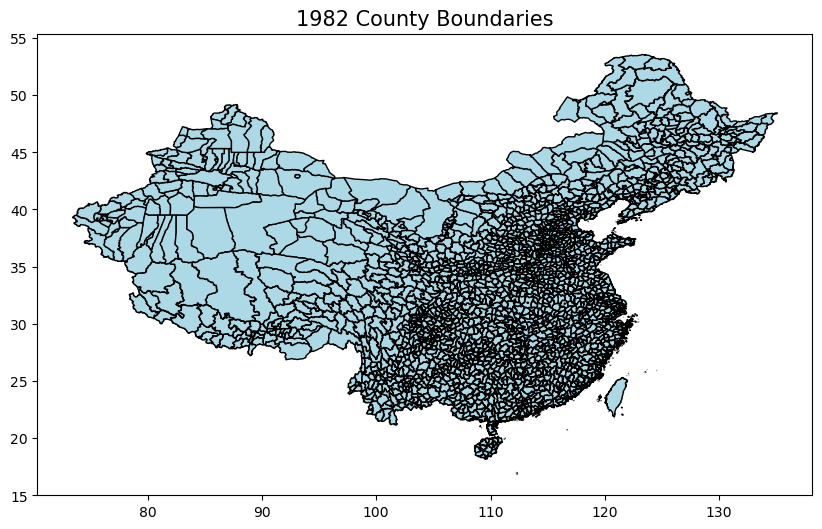

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 加载1982年县的边界数据
shp_1982 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/china_1982pop/china82.shp")

fig, ax = plt.subplots(figsize=(10, 10))
shp_1982.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# 设置标题
ax.set_title("1982 County Boundaries", fontsize=15)

# 显示图形
plt.show()


In [17]:
shp_1982 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/china_1982pop/china82.shx")
print(shp_1982.crs)


None


In [18]:
shp_1982.iloc[0]

PROVGB                                                     71
CITYGB                                                   7100
CNTYGB                                                 710000
CPROV                                                    Ì¨Íå
EPROV                                                  Taiwan
CCNTY                                                    Ì¨Íå
ECNTY                                                  Taiwan
ECNTY2                                                 Taiwan
CLASS                                                       C
P82001                                                      0
P82002                                                    0.0
P82003                                                    0.0
P82004                                                    0.0
P82005                                                    0.0
P82006                                                    0.0
P82007                                                    0.0
P82008  

In [19]:
shp_2000

,AREA,PERIMETER,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCITY,ECITY,CCNTY,...,L2000221,L2000222,L2000223,L2000224,L2000225,L2000226,L2000227,L2000228,L2000229,geometry
0,0.007,0.377,33,3306,330602,Õã½­,Zhejiang,ÉÜÐËÊÐ,Shaoxing,Ô½³ÇÇø,...,3270,10331,9911,12336,7906,10219,6086,2469,1468,"POLYGON ((120.534 30.021, 120.514 30.059, 120...."
1,0.009,0.478,33,3306,330621,Õã½­,Zhejiang,ÉÜÐËÊÐ,Shaoxing,ÉÜÐËÏØ,...,5226,9086,15279,9772,14593,18951,1935,2044,1435,"POLYGON ((120.686 30.094, 120.687 30.092, 120...."
2,0.003,0.260,11,1101,110101,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),¶«³ÇÇø,...,41,7574,8606,7129,9051,1410,4475,10027,268,"POLYGON ((116.384 39.959, 116.4 39.96, 116.4 3..."
3,0.003,0.246,11,1101,110102,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),Î÷³ÇÇø,...,32,12923,9716,14319,8320,1746,8827,11491,575,"POLYGON ((116.373 39.966, 116.383 39.967, 116...."
4,0.002,0.233,11,1101,110103,±±¾©,Beijing,±±¾©ÊÐÏ½Çø,Beijing (Districts),³çÎÄÇø,...,51,4195,7496,4946,6745,885,2433,7052,1321,"POLYGON ((116.389 39.897, 116.43 39.9, 116.444..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,0.836,4.639,65,6543,654326,ÐÂ½®,Xinjiang,°¢ÀÕÌ©µØÇø,Aletaidi,¼ªÄ¾ÄËÏØ,...,287,71,815,198,688,366,350,106,64,"POLYGON ((85.556 47.934, 85.562 47.931, 85.572..."
2872,0.055,1.088,65,6590,659001,ÐÂ½®,Xinjiang,Ö±Ï½ÐÐÕþµ¥Î»,Xinjiang (Direct Units),Ê¯ºÓ×ÓÊÐ,...,835,4722,13446,5987,12181,2573,11275,2974,1346,"POLYGON ((86.084 44.116, 86.079 44.116, 86.078..."
2873,0.000,0.000,71,7100,710000,Ì¨Íå,Taiwan,Ì¨Íå,Taiwan,Ì¨Íå,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((119.51 23.248, 119.511 23.252,..."
2874,0.000,0.000,81,8100,810000,Ïã¸Û,Hongkong,Ïã¸Û,Hongkong,Ïã¸Û,...,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((114.256 22.16, 114.254 22.164,..."


In [20]:
shp_2010[["geometry"]]

NameError: name 'shp_2010' is not defined

In [ ]:
shp_2010 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp")
print(shp_2010.crs)


PROJCS["Google_Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,0,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
shp_2010 = shp_2010.to_crs(epsg=3857)
shp_2010

,chname,ename,gbcode,a100016_10,a200003_10,a300014_10,a100001_10,a100014_10,a100013_10,a300012_10,...,a100015_10,a400015_10,l700017_10,l600024_10,l500001_10,l600023_10,l700016_10,l600025_10,l500002_10,geometry
0,¶¨½áÏØ,Dingjie,542332,1236.0,763.0,134.0,20319.0,397.0,226.0,0.0,...,2082.0,3.59,1.37,0.34,1083.0,89.70,1.47,9.95,874.0,"POLYGON ((9837600 3330586, 9837133 3330065, 98..."
1,Õ´»¯ÏØ,Zhanhua,371624,13921.0,6923.0,3223.0,351672.0,49419.0,16320.0,15236.0,...,57068.0,7.34,1.38,9.81,30251.0,62.80,1.39,27.39,24443.0,"MULTIPOLYGON (((13151631 4574665, 13151180 457..."
2,ÁÙ×ÍÇø,Linzi,370305,28629.0,12286.0,12779.0,642831.0,81254.0,23804.0,62230.0,...,108269.0,9.14,1.18,31.55,52144.0,37.12,1.19,31.34,35161.0,"POLYGON ((13155778 4435367, 13157125 4434567, ..."
3,¿¦Ê²ÊÐ,Kashen,653101,15288.0,17228.0,27076.0,506640.0,33420.0,14682.0,36305.0,...,83275.0,9.66,1.40,22.20,38764.0,33.35,1.47,44.45,20410.0,"POLYGON ((8459825 4784379, 8458610 4785074, 84..."
4,ÈêÑôÏØ,Ruyang,410326,24887.0,16067.0,1037.0,408009.0,22022.0,8909.0,17968.0,...,58773.0,7.61,1.84,10.68,29350.0,77.07,1.85,12.25,22425.0,"POLYGON ((12508288 4059159, 12509244 4058949, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,Áº×ÓºþÇø,Liangzihu,420702,9100.0,5172.0,360.0,142608.0,8716.0,3756.0,2264.0,...,19156.0,7.33,1.69,21.81,12070.0,57.40,1.71,20.80,8842.0,"POLYGON ((12755632 3554925, 12755868 3554925, ..."
2868,²ªÀûÏØ,Boli,230921,13899.0,5871.0,1759.0,299484.0,44058.0,17937.0,34480.0,...,51954.0,8.15,1.35,10.05,21809.0,68.00,1.36,21.95,13766.0,"POLYGON ((14611225 5832580, 14612407 5831584, ..."
2869,áªÉ½ÏØ,Qishan,610323,32183.0,8204.0,2088.0,459064.0,31812.0,13227.0,21851.0,...,62365.0,8.41,1.44,31.09,37700.0,44.53,1.45,24.38,24412.0,"POLYGON ((12001388 4103701, 12001562 4103140, ..."
2870,ÏÌ°²Çø,Xianan,421202,23975.0,18171.0,10161.0,512517.0,43885.0,18015.0,62080.0,...,75898.0,9.46,1.46,23.96,40299.0,38.68,1.48,37.36,24625.0,"POLYGON ((12746854 3501742, 12747418 3501369, ..."


In [ ]:
shp_1982

,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCNTY,ECNTY,ECNTY2,CLASS,P82001,...,P82009,P82010,P82011,P82012,P82013,P82014,P82015,P82016,P82017,geometry
0,71,7100,710000,Ì¨Íå,Taiwan,Ì¨Íå,Taiwan,Taiwan,C,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((123.563 25.783, 123.558 25.783..."
1,81,8100,810000,Ïã¸Û,Hongkong,Ïã¸Û,Hongkong,Hongkong,City,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((114.142 22.319, 114.136 22.32,..."
2,82,8200,820000,°ÄÃÅ,Macau,°ÄÃÅ,Macau,Macau,City,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((113.535 22.189, 113.564 22.203..."
3,11,1101,110100,±±¾©,Beijing,±±¾©ÊÐ,Beijing Shi,Beijing,City,5258214,...,5.0,10,583.0,2960,10.2,7.8,50.3,61.6,3382,"POLYGON ((116.389 40.028, 116.391 40.033, 116...."
4,11,1101,110109,±±¾©,Beijing,ÃÅÍ·¹µÇø,Mentougou Qu,Mentougou,D,259386,...,6.9,29,73.0,2907,16.3,29.5,49.9,55.8,1204,"POLYGON ((115.847 40.15, 115.854 40.147, 115.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,65,6543,654324,ÐÂ½®,Xinjiang,¹þ°ÍºÓÏØ,Habahe Xian,Habahe,C,55867,...,6.8,58,20.0,1891,21.1,76.9,6.7,33.4,449,"POLYGON ((85.556 47.934, 85.555 47.944, 85.55 ..."
2379,65,6543,654325,ÐÂ½®,Xinjiang,ÇàºÓÏØ,Qinghe Xian,Qinghe,C,38215,...,7.4,67,24.0,1577,22.5,76.7,7.7,39.6,505,"POLYGON ((90.484 47.325, 90.497 47.307, 90.52 ..."
2380,65,6543,654326,ÐÂ½®,Xinjiang,¼ªÄ¾ÄËÏØ,Jimunai Xian,Jeminay,C,28046,...,6.4,54,32.0,2419,16.9,67.2,11.1,37.8,475,"POLYGON ((85.556 47.934, 85.562 47.931, 85.572..."
2381,65,6590,659001,ÐÂ½®,Xinjiang,Ê¯ºÓ×ÓÊÐ,Shihezi Shi,Shihezi,City,549410,...,3.0,21,56.0,2780,19.7,75.0,16.7,45.8,574,"POLYGON ((86.084 44.116, 86.079 44.116, 86.078..."


In [ ]:
shp_1982

,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCNTY,ECNTY,ECNTY2,CLASS,P82001,...,P82009,P82010,P82011,P82012,P82013,P82014,P82015,P82016,P82017,geometry
0,71,7100,710000,Ì¨Íå,Taiwan,Ì¨Íå,Taiwan,Taiwan,C,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((123.563 25.783, 123.558 25.783..."
1,81,8100,810000,Ïã¸Û,Hongkong,Ïã¸Û,Hongkong,Hongkong,City,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((114.142 22.319, 114.136 22.32,..."
2,82,8200,820000,°ÄÃÅ,Macau,°ÄÃÅ,Macau,Macau,City,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,"MULTIPOLYGON (((113.535 22.189, 113.564 22.203..."
3,11,1101,110100,±±¾©,Beijing,±±¾©ÊÐ,Beijing Shi,Beijing,City,5258214,...,5.0,10,583.0,2960,10.2,7.8,50.3,61.6,3382,"POLYGON ((116.389 40.028, 116.391 40.033, 116...."
4,11,1101,110109,±±¾©,Beijing,ÃÅÍ·¹µÇø,Mentougou Qu,Mentougou,D,259386,...,6.9,29,73.0,2907,16.3,29.5,49.9,55.8,1204,"POLYGON ((115.847 40.15, 115.854 40.147, 115.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,65,6543,654324,ÐÂ½®,Xinjiang,¹þ°ÍºÓÏØ,Habahe Xian,Habahe,C,55867,...,6.8,58,20.0,1891,21.1,76.9,6.7,33.4,449,"POLYGON ((85.556 47.934, 85.555 47.944, 85.55 ..."
2379,65,6543,654325,ÐÂ½®,Xinjiang,ÇàºÓÏØ,Qinghe Xian,Qinghe,C,38215,...,7.4,67,24.0,1577,22.5,76.7,7.7,39.6,505,"POLYGON ((90.484 47.325, 90.497 47.307, 90.52 ..."
2380,65,6543,654326,ÐÂ½®,Xinjiang,¼ªÄ¾ÄËÏØ,Jimunai Xian,Jeminay,C,28046,...,6.4,54,32.0,2419,16.9,67.2,11.1,37.8,475,"POLYGON ((85.556 47.934, 85.562 47.931, 85.572..."
2381,65,6590,659001,ÐÂ½®,Xinjiang,Ê¯ºÓ×ÓÊÐ,Shihezi Shi,Shihezi,City,549410,...,3.0,21,56.0,2780,19.7,75.0,16.7,45.8,574,"POLYGON ((86.084 44.116, 86.079 44.116, 86.078..."


In [ ]:
shp_1982['centroid_1982'] = shp_1982.geometry.centroid
shp_1990['centroid_1990'] = shp_1990.geometry.centroid
shp_2000['centroid_2000'] = shp_2000.geometry.centroid

# 将县的ID（CNTYGB）与中心点（centroid）列映射
centroids_1982 = shp_1982[['CNTYGB', 'centroid_1982']]
centroids_1990 = shp_1990[['CNTYGB', 'centroid_1990']]
centroids_2000 = shp_2000[['CNTYGB', 'centroid_2000']]

In [ ]:
centroids_1982

,CNTYGB,centroid_1982
0,710000,POINT (120.955 23.753)
1,810000,POINT (114.134 22.382)
2,820000,POINT (113.563 22.146)
3,110100,POINT (116.327 39.944)
4,110109,POINT (115.78 39.997)
...,...,...
2378,654324,POINT (86.412 48.325)
2379,654325,POINT (90.406 46.245)
2380,654326,POINT (86.183 47.402)
2381,659001,POINT (86.036 44.307)


In [ ]:
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode,CNTYGB,centroid_1982_1982,CNTYGB_1982,centroid_1982_1982
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,宁夏,None,None,None,None,NaN,NaN,None,NaN,None
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,宁夏,POINT (102.76606 36.14425),POINT (102.76606 36.14425),None,POINT (102.76606258935416 36.14425184441833),NaN,632122.0,POINT (102.766 36.144),632122.0,POINT (102.766 36.144)
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,宁夏,POINT (101.75324 36.63254),POINT (101.75324 36.63254),None,POINT (101.75323508407591 36.632537677692426),NaN,630100.0,POINT (101.753 36.633),630100.0,POINT (101.753 36.633)
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,宁夏,None,None,None,None,NaN,NaN,None,NaN,None
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,宁夏,POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.0739790147858 35.423843042544235),NaN,632321.0,POINT (102.074 35.424),632321.0,POINT (102.074 35.424)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17259,17040_252牛虎兄弟和大灰狼.txt,r更映月女23岁汉族燃样大手毕止,missing values,missing values,missing values,吉林1989年旭做,missing values,NaN,NaN,...,吉林,None,None,None,None,NaN,NaN,None,NaN,None
17259,17260,16886_071李子.txt,NaN,missing values,missing values,missing values,吉林1989年如技,missing values,NaN,NaN,...,吉林,None,None,None,None,NaN,NaN,None,NaN,None
17260,17261,17073_291桃花仙子.txt,堡镇偏脸城甘农氏不识字 8杨彤歧男24罗汉族于部大专半业 采录时间 1952年5月（1988...,missing values,missing values,missing values,吉林1988年复犠,missing values,NaN,NaN,...,吉林,None,None,None,None,NaN,NaN,None,NaN,None
17261,17262,16901_091五台山.txt,于中源S 29罗汉袂救即大学毕业,missing values,missing values,missing values,吉林1987年JL植,missing values,NaN,NaN,...,吉林,None,None,None,None,NaN,NaN,None,NaN,None


In [ ]:
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,PROVGB_2000,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,CNTYGB,centroid_1982
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,老汉的宝物,宁夏,NaN,None
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏,632122.0,POINT (102.766 36.144)
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏,630100.0,POINT (101.753 36.633)
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,三姊妹,宁夏,NaN,None
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,63.0,6323.0,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏,632321.0,POINT (102.074 35.424)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17259,17040_252牛虎兄弟和大灰狼.txt,r更映月女23岁汉族燃样大手毕止,missing values,missing values,missing values,吉林1989年旭做,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉林,NaN,None
17259,17260,16886_071李子.txt,NaN,missing values,missing values,missing values,吉林1989年如技,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉林,NaN,None
17260,17261,17073_291桃花仙子.txt,堡镇偏脸城甘农氏不识字 8杨彤歧男24罗汉族于部大专半业 采录时间 1952年5月（1988...,missing values,missing values,missing values,吉林1988年复犠,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉林,NaN,None
17261,17262,16901_091五台山.txt,于中源S 29罗汉袂救即大学毕业,missing values,missing values,missing values,吉林1987年JL植,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,吉林,NaN,None


In [ ]:
df = pd.merge(df, centroids_1982, how='left', left_on='CNTYGB_1982', right_on='CNTYGB', suffixes=('', '_1982'))
df = df.drop(columns=['CNTYGB'])
df = pd.merge(df, centroids_1990, how='left', left_on='CNTYGB_1990a', right_on='CNTYGB', suffixes=('', '_1990'))
df = df.drop(columns=['CNTYGB'])
df = pd.merge(df, centroids_2000, how='left', left_on='CNTYGB_2000', right_on='CNTYGB', suffixes=('', '_2000'))
df = df.drop(columns=['CNTYGB'])
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,老汉的宝物,宁夏,None,None,None
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏,POINT (102.766 36.144),POINT (102.766 36.144),None
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏,POINT (101.753 36.633),POINT (101.753 36.633),None
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,三姊妹,宁夏,None,None,None
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,6323.0,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏,POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.074 35.424)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17259,17040_252牛虎兄弟和大灰狼.txt,r更映月女23岁汉族燃样大手毕止,missing values,missing values,missing values,吉林1989年旭做,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,吉林,None,None,None
17259,17260,16886_071李子.txt,NaN,missing values,missing values,missing values,吉林1989年如技,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,吉林,None,None,None
17260,17261,17073_291桃花仙子.txt,堡镇偏脸城甘农氏不识字 8杨彤歧男24罗汉族于部大专半业 采录时间 1952年5月（1988...,missing values,missing values,missing values,吉林1988年复犠,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,吉林,None,None,None
17261,17262,16901_091五台山.txt,于中源S 29罗汉袂救即大学毕业,missing values,missing values,missing values,吉林1987年JL植,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,吉林,None,None,None


In [ ]:
import geopandas as gpd
from shapely.geometry import MultiPoint

# 定义计算几何中心的函数
def compute_combined_centroid(row):
    # 获取非None的centroid
    non_none_centroids = [point for point in [row['centroid_1982'], row['centroid_1990'], row['centroid_2000']] if point is not None]
    
    if len(non_none_centroids) > 0:
        # 使用有效点构建MultiPoint对象
        multi_points = MultiPoint(non_none_centroids)
        # 返回MultiPoint的凸包中心点（质心）
        return multi_points.convex_hull.centroid
    else:
        # 如果没有非None的centroid，返回None
        return None
# 应用函数并将结果添加到新的列'combined_centroid'
df['combined_centroid'] = df.apply(compute_combined_centroid, axis=1)

df.head()

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,老汉的宝物,宁夏,None,None,None,None
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏,POINT (102.766 36.144),POINT (102.766 36.144),None,POINT (102.76606258935416 36.14425184441833)
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏,POINT (101.753 36.633),POINT (101.753 36.633),None,POINT (101.75323508407591 36.632537677692426)
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,三姊妹,宁夏,None,None,None,None
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏,POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.0739790147858 35.423843042544235)


In [ ]:
print(shp_2010.geometry.type.unique())  # 查看所有几何类型

['Polygon' 'MultiPolygon']


Original CRS: PROJCS["Google_Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,0,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
New CRS: EPSG:4326


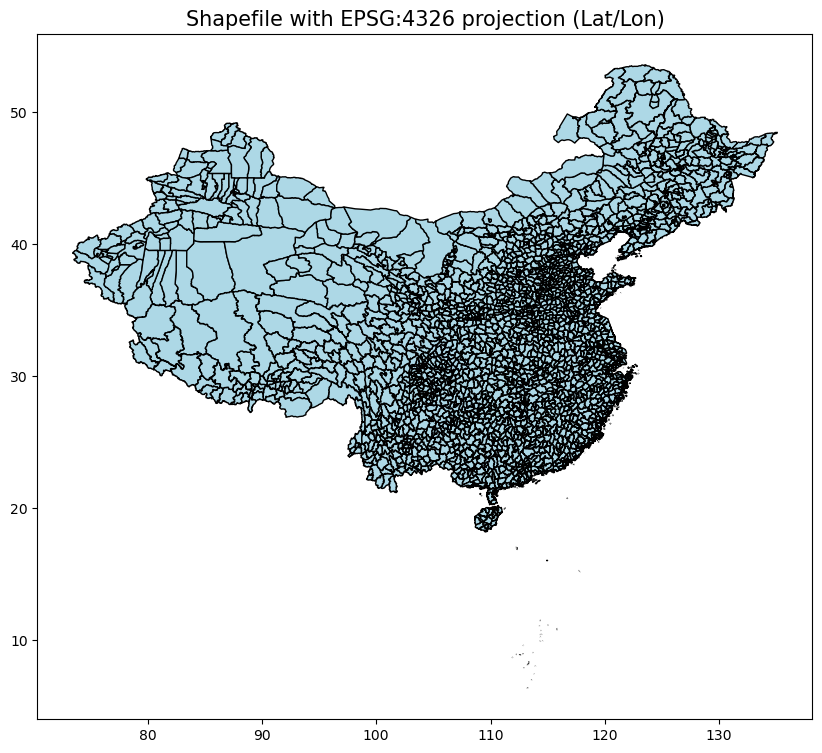

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 Shapefile 文件
shp_2010 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp")

# 查看当前坐标参考系统
print("Original CRS:", shp_2010.crs)

# 如果当前坐标系是 EPSG:3857 (Google Mercator)，我们将其转换为 EPSG:4326 (经纬度坐标系)
if shp_2010.crs != "EPSG:4326":
    shp_2010 = shp_2010.to_crs(epsg=4326)

# 检查转换后的坐标系
print("New CRS:", shp_2010.crs)

# 绘制转换后的 Shapefile 数据
fig, ax = plt.subplots(figsize=(10, 10))
shp_2010.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ax.set_title("Shapefile with EPSG:4326 projection (Lat/Lon)", fontsize=15)

# 显示图形
plt.show()


In [ ]:
import geopandas as gpd
# 创建一个GeoDataFrame，包含df中的所有combined_centroid点
centroid_gdf = gpd.GeoDataFrame(df, geometry='combined_centroid', crs=4326)

In [ ]:
# 执行空间连接，找到每个点所在的县
joined = gpd.sjoin(centroid_gdf, shp_2010, how='left', predicate='within')
# 提取并保存匹配的gbcode
df['matched_gbcode'] = joined['gbcode']
df[['combined_centroid', 'matched_gbcode']].head()


,combined_centroid,matched_gbcode
0,None,NaN
1,POINT (102.76606258935416 36.14425184441833),632122
2,POINT (101.75323508407591 36.632537677692426),630104
3,None,NaN
4,POINT (102.0739790147858 35.423843042544235),632321


In [ ]:
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,老汉的宝物,宁夏,None,None,None,None,NaN
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,NaN,造过麦山的白土城,宁夏,POINT (102.766 36.144),POINT (102.766 36.144),None,POINT (102.76606258935416 36.14425184441833),632122
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,NaN,伊斯玛悔过,宁夏,POINT (101.753 36.633),POINT (101.753 36.633),None,POINT (101.75323508407591 36.632537677692426),630104
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,三姊妹,宁夏,None,None,None,None,NaN
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,NaN,NaN,NaN,老鼠的智慧,宁夏,POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.0739790147858 35.423843042544235),632321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17259,17040_252牛虎兄弟和大灰狼.txt,r更映月女23岁汉族燃样大手毕止,missing values,missing values,missing values,吉林1989年旭做,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,None,None,None,None,NaN
17259,17260,16886_071李子.txt,NaN,missing values,missing values,missing values,吉林1989年如技,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,None,None,None,None,NaN
17260,17261,17073_291桃花仙子.txt,堡镇偏脸城甘农氏不识字 8杨彤歧男24罗汉族于部大专半业 采录时间 1952年5月（1988...,missing values,missing values,missing values,吉林1988年复犠,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,None,None,None,None,NaN
17261,17262,16901_091五台山.txt,于中源S 29罗汉袂救即大学毕业,missing values,missing values,missing values,吉林1987年JL植,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,None,None,None,None,NaN


In [ ]:
# 将 df 保存到指定文件夹和文件名
df.to_excel('/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241202spatial_join_2010.xlsx', index=False, engine='openpyxl')


In [ ]:
# 如果 matched_gbcode 列有值，则填充 CNTYGB_2010，否则保持原值
df['CNTYGB_2010'] = df.apply(lambda row: row['matched_gbcode'] if pd.notna(row['matched_gbcode']) else row['CNTYGB_2010'], axis=1)

In [ ]:
df_filtered = df[df['matched_gbcode'].notna()]
df_filtered

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,NaN,造过麦山的白土城,宁夏,POINT (102.766 36.144),POINT (102.766 36.144),None,POINT (102.76606258935416 36.14425184441833),632122
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,NaN,伊斯玛悔过,宁夏,POINT (101.753 36.633),POINT (101.753 36.633),None,POINT (101.75323508407591 36.632537677692426),630104
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,NaN,NaN,NaN,老鼠的智慧,宁夏,POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.074 35.424),POINT (102.0739790147858 35.423843042544235),632321
5,6,06997__285.大人山和弯角顶,黄益新 1987年采录于信宜县,44,4410,440983,广东信宜县,"{'lng': 110.953582, 'lat': 22.360093}",44.0,4463.0,...,NaN,NaN,NaN,大人山和弯角顶,广东,POINT (111.116 22.429),POINT (111.116 22.429),POINT (111.116 22.429),POINT (111.11566998639559 22.42858813202635),440983
6,7,07006__294.丹霞山出米洞,黄海燕 1987年8月采录于花县新华镇乐同乡,44,4402,440224,广东仁化县,"{'lng': 113.748627, 'lat': 25.088226}",44.0,4461.0,...,NaN,NaN,NaN,丹霞山出米洞,广东,POINT (113.757 25.203),POINT (113.757 25.203),POINT (113.757 25.203),POINT (113.7567846761256 25.203274176247096),440224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,17228,17024_231鱼神脸儿的传说.txt,NaN,22,2204,220421,吉林东丰县,"{'lng': 125.529623, 'lat': 42.675228}",22.0,2201.0,...,NaN,NaN,NaN,NaN,吉林,POINT (125.441 42.676),POINT (125.441 42.676),None,POINT (125.44107003229747 42.67617751980253),220421
17228,17229,17274_540王辩护.txt,杨国良务40罗干坏爲中毕业 采录时间，1986年,22,2204,220421,吉林东丰县,"{'lng': 125.529623, 'lat': 42.675228}",22.0,2201.0,...,NaN,NaN,NaN,NaN,吉林,POINT (125.441 42.676),POINT (125.441 42.676),None,POINT (125.44107003229747 42.67617751980253),220421
17229,17230,16979_181晳麻的传说.txt,t 41男36罗和氏初中毕业,22,2204,220421,吉林东丰县,"{'lng': 125.529623, 'lat': 42.675228}",22.0,2201.0,...,NaN,NaN,NaN,NaN,吉林,POINT (125.441 42.676),POINT (125.441 42.676),None,POINT (125.44107003229747 42.67617751980253),220421
17230,17231,17017_223哭花轿的传说.txt,見连生 ? 31歹汉津农氏初中毕业,22,2204,220421,吉林东丰县,"{'lng': 125.529623, 'lat': 42.675228}",22.0,2201.0,...,NaN,NaN,NaN,NaN,吉林,POINT (125.441 42.676),POINT (125.441 42.676),None,POINT (125.44107003229747 42.67617751980253),220421


In [ ]:
shp_2010.columns

Index(['chname', 'ename', 'gbcode', 'a100016_10', 'a200003_10', 'a300014_10',
       'a100001_10', 'a100014_10', 'a100013_10', 'a300012_10', 'a400013_10',
       'a200004_10', 'a300013_10', 'a100011_10', 'a100005_10', 'a200001_10',
       'a100009_10', 'a100017_10', 'a100006_10', 'a100008_10', 'a400014_10',
       'a200002_10', 'a100010_10', 'a100007_10', 'a100015_10', 'a400015_10',
       'l700017_10', 'l600024_10', 'l500001_10', 'l600023_10', 'l700016_10',
       'l600025_10', 'l500002_10', 'geometry', 'contains_centroid'],
      dtype='object')

这一步的目的是计算所有县的中心点的 **凸包**（Convex Hull），并得到这个凸包的几何中心（重心）。

### 详细解释：
1. **`all_shps['centroid']`**：
   - `all_shps['centroid']` 是所有县的几何中心（即重心）。假设每个县是一个多边形，这里的 `centroid` 是该多边形的几何中心，表示县的中心点。

2. **`unary_union`**：
   - `unary_union` 是用于将多个几何对象（如多个点、线或多边形）合并成一个单一的几何对象。如果你有多个县的中心点（这些点是由 `centroid` 列生成的），`unary_union` 会将这些点合并为一个整体的几何形状。这是必要的，因为在这一步我们需要对多个点计算一个最小外接多边形。

3. **`convex_hull`**：
   - `convex_hull` 计算给定几何对象的 **凸包**，即能够包围所有点的最小多边形。对于合并后的所有县的中心点，凸包会计算出一个最小的多边形，它包含了所有这些点。
   - 凸包的性质是，它是一个最小的凸形状，可以认为是用一个弹性膜包住所有点得到的形状。

4. **`centroid`**：
   - 最后，通过 `centroid` 属性，你可以获取 **凸包** 的几何中心，即凸包多边形的重心。这个点代表了这组县中心点的“中心位置”。

### 举例：
假设你有5个县的中心点，你使用 `unary_union` 合并这5个点，然后计算出一个最小的凸包（包围这些点的多边形）。然后，计算该多边形的几何中心，得到一个表示这5个县中心点的中心位置的点。

总结来说，`all_shps['centroid'].unary_union.convex_hull` 是将所有县中心点合并并计算最小外接多边形，最终得到一个代表这些县中心点的重心点。

如果你有更多疑问或需要进一步的解释，请告诉我！

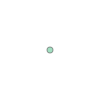

In [ ]:
centroid_of_hull

In [ ]:
import geopandas as gpd

# 加载2010年县的边界数据
shp_2010 = gpd.read_file("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp")

# 选择第一个县（根据需要选择其他县）
county_2010 = shp_2010.iloc[0]  # 选择第一个县作为示例

# 获取该县的几何中心
county_centroid = county_2010.geometry.centroid

# 打印出这个县的几何中心
print(f"County center (2010) centroid: {county_centroid}")

# 检查该县的边界是否包含重心点
contains_centroid = county_2010.geometry.contains(county_centroid)

# 打印检查结果
print(f"Does the 2010 county contain the centroid of the convex hull? {contains_centroid}")


County center (2010) centroid: POINT (9786076.546530066 3277980.7416067384)
Does the 2010 county contain the centroid of the convex hull? True


In [ ]:
shp_2010['contains_centroid'] = shp_2010.geometry.contains(county_centroid)
filtered_counties = shp_2010[shp_2010['contains_centroid'] == True]
filtered_counties

,chname,ename,gbcode,a100016_10,a200003_10,a300014_10,a100001_10,a100014_10,a100013_10,a300012_10,...,a400015_10,l700017_10,l600024_10,l500001_10,l600023_10,l700016_10,l600025_10,l500002_10,geometry,contains_centroid
0,¶¨½áÏØ,Dingjie,542332,1236.0,763.0,134.0,20319.0,397.0,226.0,0.0,...,3.59,1.37,0.34,1083.0,89.7,1.47,9.95,874.0,"POLYGON ((9837600 3330586, 9837133 3330065, 98...",True


In [ ]:
centroid_gdf = gpd.GeoDataFrame(geometry=[county_centroid], crs=shp_2010.crs)
joined = gpd.sjoin(centroid_gdf, shp_2010, how='left', predicate='within')
joined

,geometry,index_right,chname,ename,gbcode,a100016_10,a200003_10,a300014_10,a100001_10,a100014_10,...,a100015_10,a400015_10,l700017_10,l600024_10,l500001_10,l600023_10,l700016_10,l600025_10,l500002_10,contains_centroid
0,POINT (9786076.547 3277980.742),0,¶¨½áÏØ,Dingjie,542332,1236.0,763.0,134.0,20319.0,397.0,...,2082.0,3.59,1.37,0.34,1083.0,89.7,1.47,9.95,874.0,True


In [ ]:
joined.columns

Index(['geometry', 'index_right', 'chname', 'ename', 'gbcode', 'a100016_10',
       'a200003_10', 'a300014_10', 'a100001_10', 'a100014_10', 'a100013_10',
       'a300012_10', 'a400013_10', 'a200004_10', 'a300013_10', 'a100011_10',
       'a100005_10', 'a200001_10', 'a100009_10', 'a100017_10', 'a100006_10',
       'a100008_10', 'a400014_10', 'a200002_10', 'a100010_10', 'a100007_10',
       'a100015_10', 'a400015_10', 'l700017_10', 'l600024_10', 'l500001_10',
       'l600023_10', 'l700016_10', 'l600025_10', 'l500002_10',
       'contains_centroid'],
      dtype='object')

In [2]:
import geopandas as gpd
import pandas as pd

# 定义文件路径
shapefile_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp'
excel_file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241202spatial_join_2010.xlsx'

# 读取 shapefile 文件
shapefile_data = gpd.read_file(shapefile_path)
# 读取 Excel 文件
excel_data = pd.read_excel(excel_file_path)

In [3]:
shapefile_data.head()

,chname,ename,gbcode,a100016_10,a200003_10,a300014_10,a100001_10,a100014_10,a100013_10,a300012_10,...,a100015_10,a400015_10,l700017_10,l600024_10,l500001_10,l600023_10,l700016_10,l600025_10,l500002_10,geometry
0,¶¨½áÏØ,Dingjie,542332,1236.0,763.0,134.0,20319.0,397.0,226.0,0.0,...,2082.0,3.59,1.37,0.34,1083.0,89.70,1.47,9.95,874.0,"POLYGON ((9837600 3330586, 9837133 3330065, 98..."
1,Õ´»¯ÏØ,Zhanhua,371624,13921.0,6923.0,3223.0,351672.0,49419.0,16320.0,15236.0,...,57068.0,7.34,1.38,9.81,30251.0,62.80,1.39,27.39,24443.0,"MULTIPOLYGON (((13151631 4574665, 13151180 457..."
2,ÁÙ×ÍÇø,Linzi,370305,28629.0,12286.0,12779.0,642831.0,81254.0,23804.0,62230.0,...,108269.0,9.14,1.18,31.55,52144.0,37.12,1.19,31.34,35161.0,"POLYGON ((13155778 4435367, 13157125 4434567, ..."
3,¿¦Ê²ÊÐ,Kashen,653101,15288.0,17228.0,27076.0,506640.0,33420.0,14682.0,36305.0,...,83275.0,9.66,1.40,22.20,38764.0,33.35,1.47,44.45,20410.0,"POLYGON ((8459825 4784379, 8458610 4785074, 84..."
4,ÈêÑôÏØ,Ruyang,410326,24887.0,16067.0,1037.0,408009.0,22022.0,8909.0,17968.0,...,58773.0,7.61,1.84,10.68,29350.0,77.07,1.85,12.25,22425.0,"POLYGON ((12508288 4059159, 12509244 4058949, ..."


In [5]:
excel_data.head()

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,老汉的宝物,宁夏,NaN,NaN,NaN,NaN,NaN
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,632122.0,造过麦山的白土城,宁夏,POINT (102.76606258935416 36.14425184441833),POINT (102.76606258935416 36.14425184441833),NaN,POINT (102.76606258935416 36.14425184441833),632122.0
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,630104.0,伊斯玛悔过,宁夏,POINT (101.75323508407594 36.63253767769244),POINT (101.75323508407588 36.632537677692405),NaN,POINT (101.75323508407591 36.632537677692426),630104.0
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,三姊妹,宁夏,NaN,NaN,NaN,NaN,NaN
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,NaN,NaN,632321.0,老鼠的智慧,宁夏,POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),632321.0


In [36]:
excel_data

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,老汉的宝物,宁夏,NaN,NaN,NaN,NaN,NaN
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,NaN,NaN,632122.0,造过麦山的白土城,宁夏,POINT (102.76606258935416 36.14425184441833),POINT (102.76606258935416 36.14425184441833),NaN,POINT (102.76606258935416 36.14425184441833),632122.0
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,NaN,NaN,630104.0,伊斯玛悔过,宁夏,POINT (101.75323508407594 36.63253767769244),POINT (101.75323508407588 36.632537677692405),NaN,POINT (101.75323508407591 36.632537677692426),630104.0
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,三姊妹,宁夏,NaN,NaN,NaN,NaN,NaN
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,NaN,NaN,632321.0,老鼠的智慧,宁夏,POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),POINT (102.0739790147858 35.423843042544235),632321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17259,17040_252牛虎兄弟和大灰狼.txt,r更映月女23岁汉族燃样大手毕止,missing values,missing values,missing values,吉林1989年旭做,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,NaN,NaN,NaN,NaN,NaN
17259,17260,16886_071李子.txt,NaN,missing values,missing values,missing values,吉林1989年如技,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,NaN,NaN,NaN,NaN,NaN
17260,17261,17073_291桃花仙子.txt,堡镇偏脸城甘农氏不识字 8杨彤歧男24罗汉族于部大专半业 采录时间 1952年5月（1988...,missing values,missing values,missing values,吉林1988年复犠,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,NaN,NaN,NaN,NaN,NaN
17261,17262,16901_091五台山.txt,于中源S 29罗汉袂救即大学毕业,missing values,missing values,missing values,吉林1987年JL植,missing values,NaN,NaN,...,NaN,NaN,NaN,NaN,吉林,NaN,NaN,NaN,NaN,NaN


In [27]:
import geopandas as gpd
import pandas as pd

shapefile_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp'
excel_file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241202spatial_join_2010.xlsx'
output_file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241203shapefile2010_gbcode_counts.xlsx'

shapefile_data = gpd.read_file(shapefile_path)
excel_data = pd.read_excel(excel_file_path)

shapefile_gbcode = shapefile_data[['chname', 'ename', 'gbcode']]

# 统计 matched_gbcode 的出现次数并转为 DataFrame
gbcode_counts = excel_data['matched_gbcode'].value_counts().reset_index()
gbcode_counts.columns = ['gbcode', 'match_count']

In [28]:
# 将 NaN 替换为 0
gbcode_counts['gbcode'] = gbcode_counts['gbcode'].fillna(0)

# 将列转换为整数类型
gbcode_counts['gbcode'] = gbcode_counts['gbcode'].astype(int)

In [29]:
shapefile_gbcode['gbcode'] = shapefile_gbcode['gbcode'].astype(int)
shapefile_gbcode

/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_50611/4124547237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shapefile_gbcode['gbcode'] = shapefile_gbcode['gbcode'].astype(int)


,chname,ename,gbcode
0,¶¨½áÏØ,Dingjie,542332
1,Õ´»¯ÏØ,Zhanhua,371624
2,ÁÙ×ÍÇø,Linzi,370305
3,¿¦Ê²ÊÐ,Kashen,653101
4,ÈêÑôÏØ,Ruyang,410326
...,...,...,...
2867,Áº×ÓºþÇø,Liangzihu,420702
2868,²ªÀûÏØ,Boli,230921
2869,áªÉ½ÏØ,Qishan,610323
2870,ÏÌ°²Çø,Xianan,421202


In [30]:
gbcode_counts

,gbcode,match_count
0,310101,172
1,640221,155
2,310109,109
3,110229,105
4,120116,90
...,...,...
1716,350102,1
1717,130533,1
1718,431081,1
1719,653022,1


In [32]:
shapefile_gbcode

,chname,ename,gbcode
0,¶¨½áÏØ,Dingjie,542332
1,Õ´»¯ÏØ,Zhanhua,371624
2,ÁÙ×ÍÇø,Linzi,370305
3,¿¦Ê²ÊÐ,Kashen,653101
4,ÈêÑôÏØ,Ruyang,410326
...,...,...,...
2867,Áº×ÓºþÇø,Liangzihu,420702
2868,²ªÀûÏØ,Boli,230921
2869,áªÉ½ÏØ,Qishan,610323
2870,ÏÌ°²Çø,Xianan,421202


In [16]:
shapefile_gbcode

,chname,ename,gbcode
0,¶¨½áÏØ,Dingjie,542332
1,Õ´»¯ÏØ,Zhanhua,371624
2,ÁÙ×ÍÇø,Linzi,370305
3,¿¦Ê²ÊÐ,Kashen,653101
4,ÈêÑôÏØ,Ruyang,410326
...,...,...,...
2867,Áº×ÓºþÇø,Liangzihu,420702
2868,²ªÀûÏØ,Boli,230921
2869,áªÉ½ÏØ,Qishan,610323
2870,ÏÌ°²Çø,Xianan,421202


In [34]:
result = shapefile_gbcode.merge(gbcode_counts, on='gbcode', how='left')
result['match_count'] = result['match_count'].fillna(0).astype(int)
result

,chname,ename,gbcode,match_count
0,¶¨½áÏØ,Dingjie,542332,0
1,Õ´»¯ÏØ,Zhanhua,371624,0
2,ÁÙ×ÍÇø,Linzi,370305,0
3,¿¦Ê²ÊÐ,Kashen,653101,7
4,ÈêÑôÏØ,Ruyang,410326,3
...,...,...,...,...
2867,Áº×ÓºþÇø,Liangzihu,420702,0
2868,²ªÀûÏØ,Boli,230921,0
2869,áªÉ½ÏØ,Qishan,610323,17
2870,ÏÌ°²Çø,Xianan,421202,15


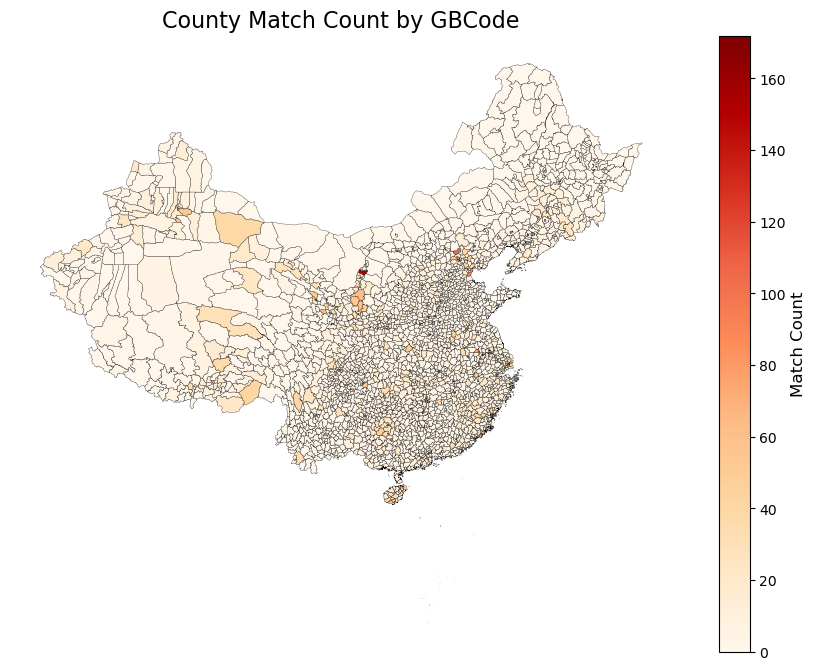

地图已保存到文件: /Users/zhaorunping/Desktop/241203colored_map_by_match_count.png


In [46]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建分组和颜色映射
color_map = plt.cm.OrRd  # 使用 "Orange-Red" 色系
norm = mcolors.Normalize(vmin=shapefile_data['match_count'].min(), vmax=shapefile_data['match_count'].max())

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
shapefile_data.plot(column='match_count', cmap=color_map, norm=norm, linewidth=0.2, edgecolor='black', ax=ax)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm._A = []  # 仅用于生成颜色条
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Match Count', fontsize=12)

# 添加标题和隐藏轴
ax.set_title('County Match Count by GBCode', fontsize=16)
ax.axis('off')

# 保存地图
plt.savefig(output_map_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"地图已保存到文件: {output_map_path}")

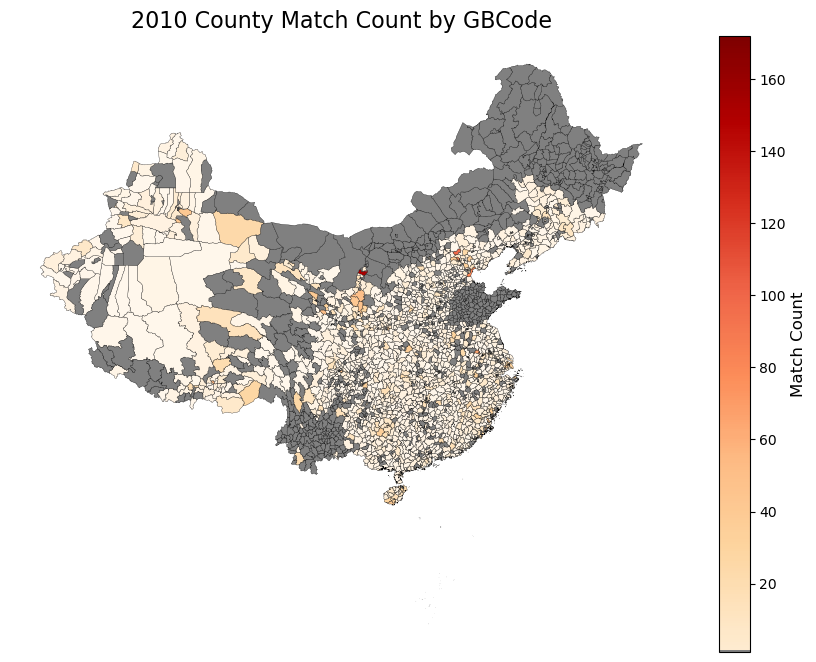

地图已保存到文件: /Users/zhaorunping/Desktop/241203colored_map_by_match_count.png


In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import numpy as np  # 确保导入 numpy


# 为0的县特别着色
special_color = 'gray'  # 特别颜色，用于 match_count=0 的区域
color_map_base = plt.cm.OrRd  # 基础颜色映射 "Orange-Red"
color_map = ListedColormap([special_color] + list(color_map_base(np.linspace(0.1, 1, 256))))

# 创建标准化范围，排除match_count=0以优化视觉分布
vmin = shapefile_data.loc[shapefile_data['match_count'] > 0, 'match_count'].min()
vmax = shapefile_data['match_count'].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# 根据 match_count 值分配颜色，为 0 的值特别处理
shapefile_data['color'] = shapefile_data['match_count'].apply(
    lambda x: special_color if x == 0 else color_map_base(norm(x))
)
shapefile_data.plot(
    color=shapefile_data['color'],
    linewidth=0.2, 
    edgecolor='black', 
    ax=ax
)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  # 用于生成颜色条
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Match Count', fontsize=12)

# 添加标题和隐藏轴
ax.set_title('2010 County Match Count by GBCode', fontsize=16)
ax.axis('off')

# 保存地图
plt.savefig(output_map_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"地图已保存到文件: {output_map_path}")

In [35]:
result.to_excel(output_file_path, index=False, engine='openpyxl')
